# Car Features and MSRP

# Abstract and data fields

The car feature data was collected . Dataset contains various vehicle specs, consumer and critic ratings, and prices. Dataset contains 11,915 car samples. Some of the cars were used, and some were new. We have a look into the data related to used cars and understand the relationships among various variables and figure out the features which have a maximum impact on price.

Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as statmodel

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Reading Excel file

In [2]:
df= pd.read_csv('data.csv')

### Reading Entries 

In [3]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,EngineHP,EngineCylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highwayMPG,citympg,Popularity,MSRP,Popular
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Popular
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Popular
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Popular
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Popular
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Popular


### Data Columns 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 17 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
EngineHP             11845 non-null float64
EngineCylinders      11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highwayMPG           11914 non-null int64
citympg              11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
Popular              11914 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 1.5+ MB


### Column list 

In [5]:
list(df)

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'EngineHP',
 'EngineCylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highwayMPG',
 'citympg',
 'Popularity',
 'MSRP',
 'Popular']

### Null value columns 

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
EngineHP               69
EngineCylinders        30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highwayMPG              0
citympg                 0
Popularity              0
MSRP                    0
Popular                 0
dtype: int64

In [7]:
values = df['EngineHP'].mean()
values

249.38607007176023

In [8]:
#values = { ' Engine HP ': df["Engine HP"].mean(), ' Engine Cylinders ': df["Engine Cylinders"].mean()}
df.fillna(value=values, inplace=True)
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
EngineHP             0
EngineCylinders      0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highwayMPG           0
citympg              0
Popularity           0
MSRP                 0
Popular              0
dtype: int64

In [9]:
df.drop(['Market Category'],axis=1)

,Make,Model,Year,Engine Fuel Type,EngineHP,EngineCylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highwayMPG,citympg,Popularity,MSRP,Popular
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,Popular
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,Popular
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,Popular
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,Popular
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,Popular
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,31200,Popular
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,3916,44100,Popular
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,39300,Popular
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,36900,Popular
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,3916,37200,Popular


# Exploratory Data Analysis

# Pairplot :
Histagrams of all the columns. It also gives co-relation scatter plots. 

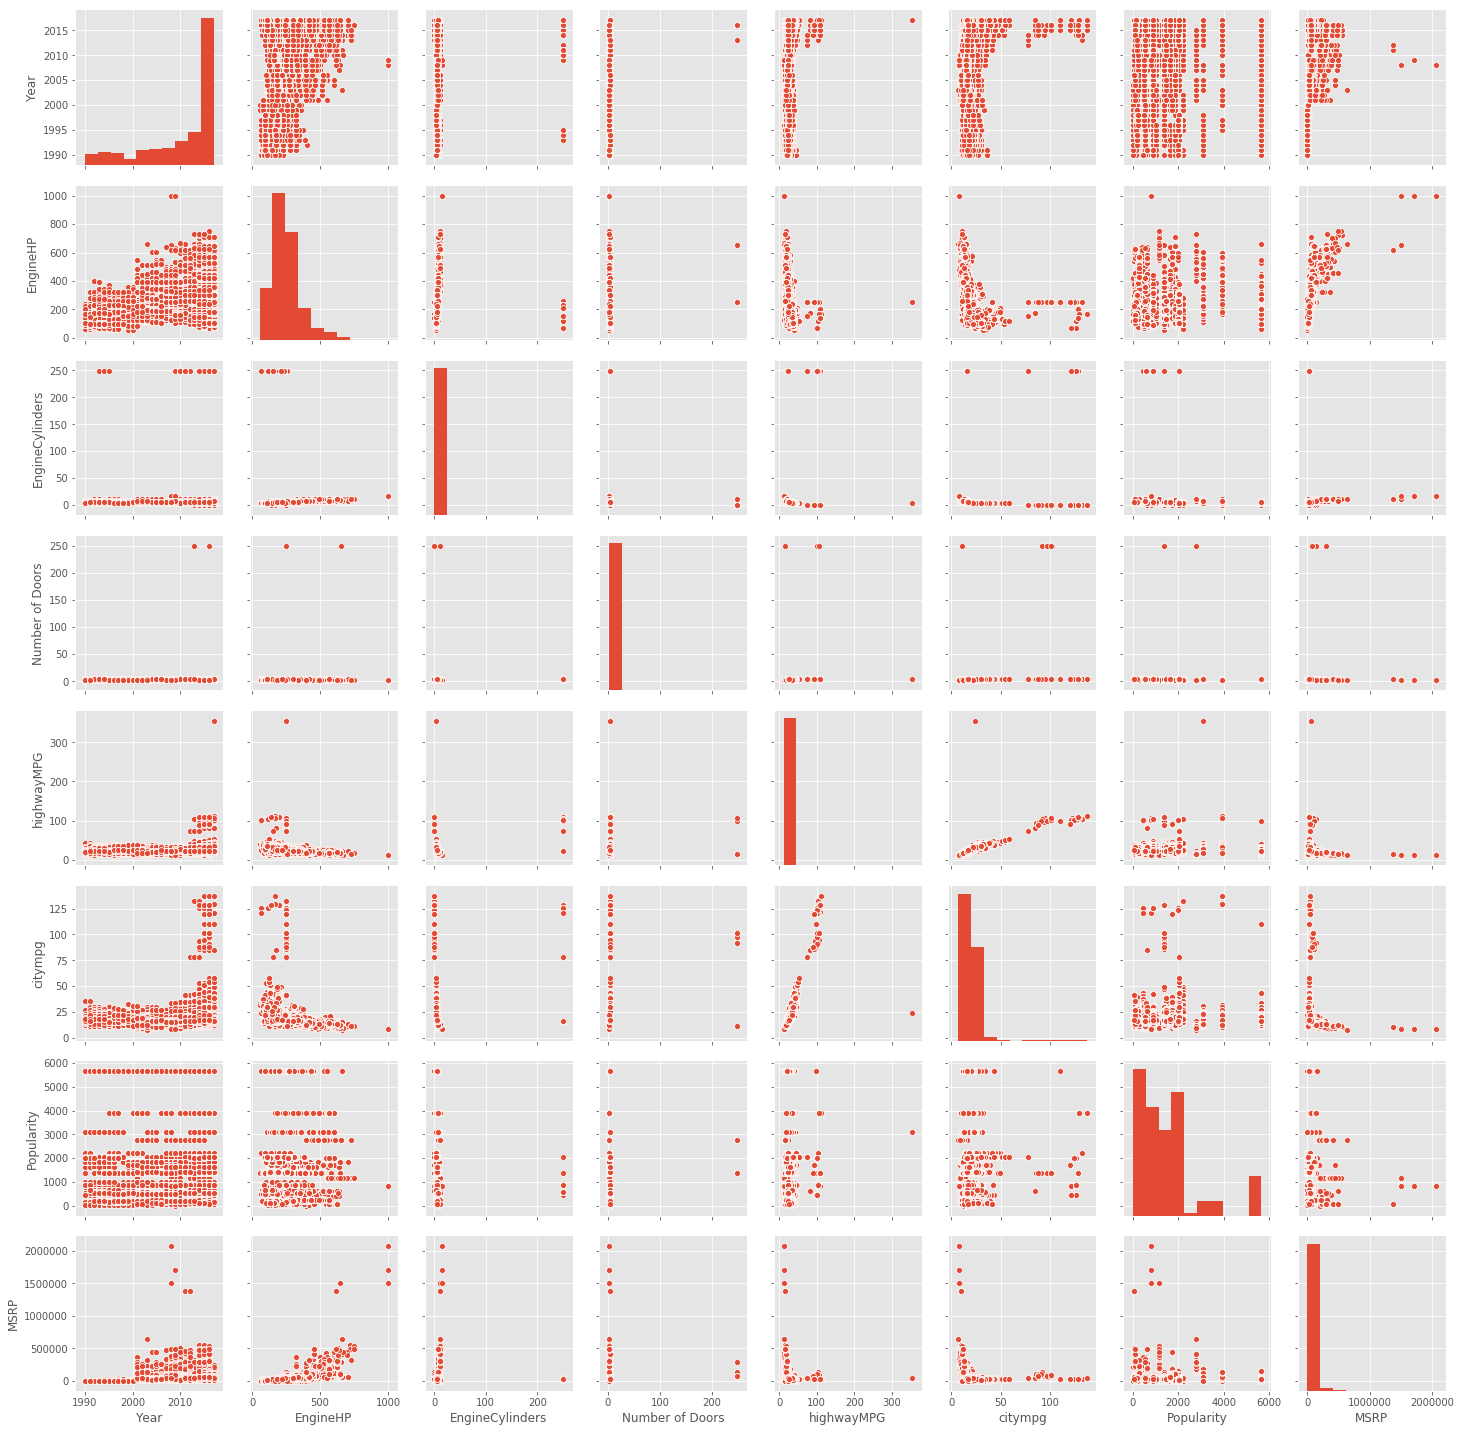

In [10]:
sns.pairplot(df)

### Distplot

### Distribution of MSRP (Target column)
Distribution of target column.

C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


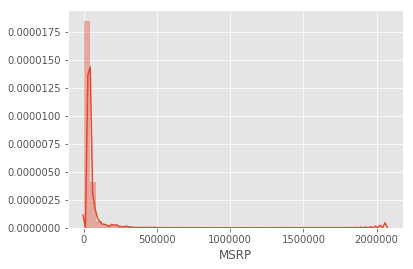

In [11]:
sns.distplot(df['MSRP'])

In [12]:
df.corr()

,Year,EngineHP,EngineCylinders,Number of Doors,highwayMPG,citympg,Popularity,MSRP
Year,1.000000,0.351288,-0.007398,0.056548,0.258240,0.198171,0.073049,0.227590
EngineHP,0.351288,1.000000,0.087096,-0.002535,-0.353343,-0.346308,0.037315,0.661644
EngineCylinders,-0.007398,0.087096,1.000000,-0.007551,0.037575,0.090932,-0.023188,0.066651
Number of Doors,0.056548,-0.002535,-0.007551,1.000000,0.174369,0.176023,-0.006587,0.009365
highwayMPG,0.258240,-0.353343,0.037575,0.174369,1.000000,0.886829,-0.020991,-0.160043
citympg,0.198171,-0.346308,0.090932,0.176023,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037315,-0.023188,-0.006587,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.661644,0.066651,0.009365,-0.160043,-0.157676,-0.048476,1.000000


#### Regplot for EngineHP and highwayMPG

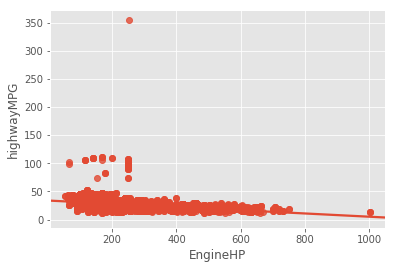

In [13]:
sns.regplot(x="EngineHP", y="highwayMPG", data=df)

####  Regplot for EngineHP and citympg

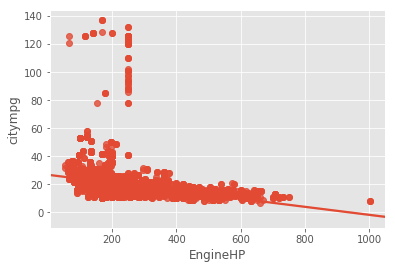

In [14]:
sns.regplot(x="EngineHP", y="citympg", data=df)

#### Regplot for EngineHP and Popularity

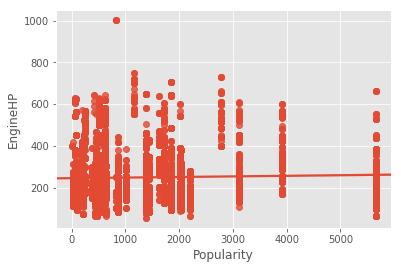

In [15]:
sns.regplot(x="Popularity", y="EngineHP", data=df)

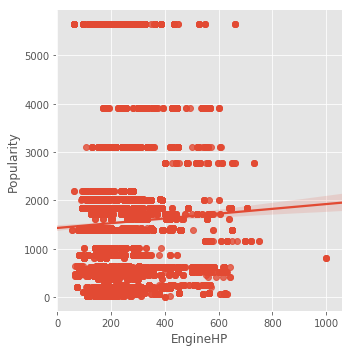

In [16]:
sns.lmplot(y="Popularity", x="EngineHP", data=df)

### Heatmap for corelation of the columns 

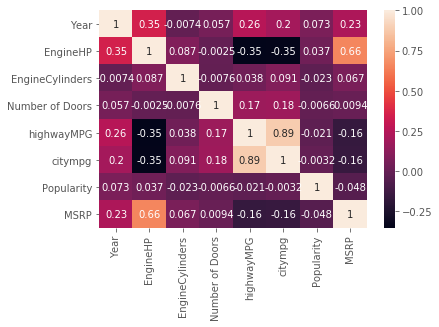

In [17]:
sns.heatmap(df.corr(),annot=True)

## Summary of Models for Multiple Linear Regression

In [18]:
model1=df[['Popularity','MSRP','citympg','highwayMPG']]
model2=df[['Popularity','MSRP','citympg','EngineHP']]
model3=df[['Popularity','MSRP','highwayMPG','citympg']]
model4=df[['Popularity','MSRP','citympg','highwayMPG','EngineHP']]

## OLS summary for Model 1 

In [19]:
model_1= ols("MSRP ~ Popularity + citympg + highwayMPG-1", data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:56:30   Log-Likelihood:            -1.4848e+05
No. Observations:               11914   AIC:                         2.970e+05
Df Residuals:                   11911   BIC:                         2.970e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Popularity     2.5400      0.375      6.773      0.000       1.805       3.275
citympg    -1918.7100    131.747    -14.564      0.000   -2176.955   -1660.465
highwayMPG  2582.9864    104.997     24.601      0.000    2377.175    2788.797
==============================================================================
Omnibus:                    19659.994   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29648304.755
Skew:                          10.775   Prob(JB):                         0.00
Kurtosis:                     246.434   Cond. No.                         618.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Verifying Assumptions for Model_1

In [20]:
Tol=1- model_1.rsquared
Tol

0.7435810948115364

In [21]:
vtf= 1/Tol
vtf

1.3448432282338403

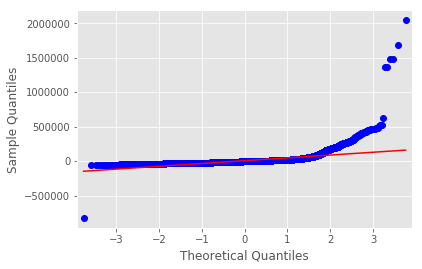

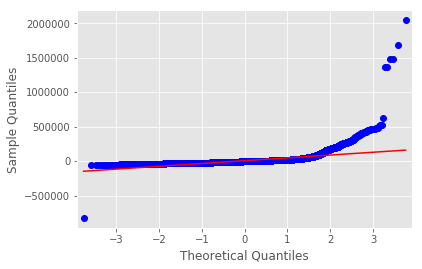

In [22]:
#Q-Q plot to check multivariate normality
plot1= model_1.resid
statmodel.qqplot(plot1,line='r')

In [23]:
#Checking multicollinearity using corelation matrix
model1.corr()

,Popularity,MSRP,citympg,highwayMPG
Popularity,1.000000,-0.048476,-0.003217,-0.020991
MSRP,-0.048476,1.000000,-0.157676,-0.160043
citympg,-0.003217,-0.157676,1.000000,0.886829
highwayMPG,-0.020991,-0.160043,0.886829,1.000000


# OLS summary_Model_2

In [24]:
model_2 = ols("MSRP ~ Popularity+citympg+EngineHP-1", data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     5506.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:56:31   Log-Likelihood:            -1.4506e+05
No. Observations:               11914   AIC:                         2.901e+05
Df Residuals:                   11911   BIC:                         2.902e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Popularity    -5.4290      0.291    -18.688      0.000      -5.998      -4.860
citympg     -774.1689     32.974    -23.478      0.000    -838.804    -709.534
EngineHP     271.9652      2.679    101.506      0.000     266.713     277.217
==============================================================================
Omnibus:                    23486.994   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        100028649.502
Skew:                          15.603   Prob(JB):                         0.00
Kurtosis:                     450.803   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Calculation of Tolerance – the tolerance measures the influence of one independent variable on all other independent variables
Tolerance2=1-model_2.rsquared
Tolerance2

0.41895202762661565

In [26]:
VIF2=(1/Tolerance2)
VIF2

2.3869081280380726

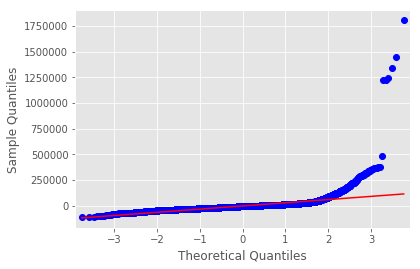

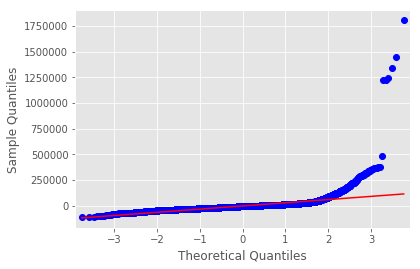

In [27]:
#Q-Q plot to check multivariate normality
plot2= model_2.resid
statmodel.qqplot(plot2,line='r')

In [28]:
#Checking multicollinearity using corelation matrix
model2.corr()

,Popularity,MSRP,citympg,EngineHP
Popularity,1.000000,-0.048476,-0.003217,0.037315
MSRP,-0.048476,1.000000,-0.157676,0.661644
citympg,-0.003217,-0.157676,1.000000,-0.346308
EngineHP,0.037315,0.661644,-0.346308,1.000000


# OLS summary_Model_3

In [29]:
# Summary of linear model_3

model_3 = ols("MSRP ~ Popularity+citympg+highwayMPG-1", data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:56:32   Log-Likelihood:            -1.4848e+05
No. Observations:               11914   AIC:                         2.970e+05
Df Residuals:                   11911   BIC:                         2.970e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Popularity     2.5400      0.375      6.773      0.000       1.805       3.275
citympg    -1918.7100    131.747    -14.564      0.000   -2176.955   -1660.465
highwayMPG  2582.9864    104.997     24.601      0.000    2377.175    2788.797
==============================================================================
Omnibus:                    19659.994   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29648304.755
Skew:                          10.775   Prob(JB):                         0.00
Kurtosis:                     246.434   Cond. No.                         618.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#Calculation of Tolerance – the tolerance measures the influence of one independent variable on all other independent variables
Tolerance3=1-model_3.rsquared
Tolerance3

0.7435810948115364

In [31]:
VIF3=(1/Tolerance3)
VIF3

1.3448432282338403

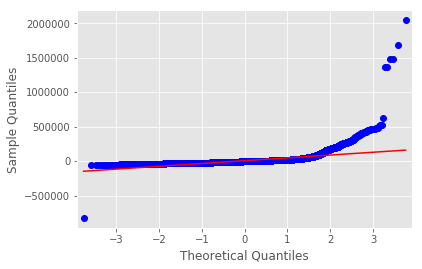

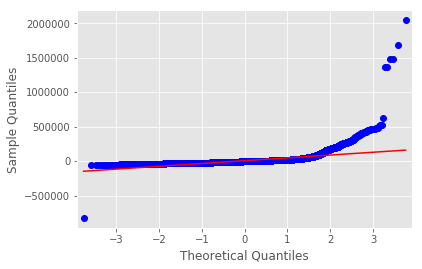

In [32]:
#Q-Q plot to check multivariate normality
plot3= model_3.resid
statmodel.qqplot(plot3,line='r')

In [33]:
#Checking multicollinearity using corelation matrix
model3.corr()

,Popularity,MSRP,highwayMPG,citympg
Popularity,1.000000,-0.048476,-0.020991,-0.003217
MSRP,-0.048476,1.000000,-0.160043,-0.157676
highwayMPG,-0.020991,-0.160043,1.000000,0.886829
citympg,-0.003217,-0.157676,0.886829,1.000000


# Summary of linear model_4

In [34]:


model_4 = ols("MSRP ~ Popularity+citympg+highwayMPG+EngineHP-1", data=df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     4281.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:56:33   Log-Likelihood:            -1.4494e+05
No. Observations:               11914   AIC:                         2.899e+05
Df Residuals:                   11910   BIC:                         2.899e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Popularity    -4.9797      0.289    -17.239      0.000      -5.546      -4.414
citympg      757.0880    101.569      7.454      0.000     557.996     956.180
highwayMPG -1398.8400     87.867    -15.920      0.000   -1571.074   -1226.606
EngineHP     293.8704      2.987     98.379      0.000     288.015     299.726
==============================================================================
Omnibus:                    23472.350   Durbin-Watson:                   0.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        100526455.384
Skew:                          15.577   Prob(JB):                         0.00
Kurtosis:                     451.925   Cond. No.                         663.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Calculation of Tolerance – the tolerance measures the influence of one independent variable on all other independent variables
Tolerance4=1-model_4.rsquared
Tolerance4

0.4102225186389967

In [36]:
VIF4=(1/Tolerance4)
VIF4

2.4377013805037313

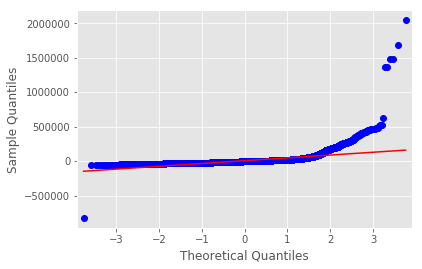

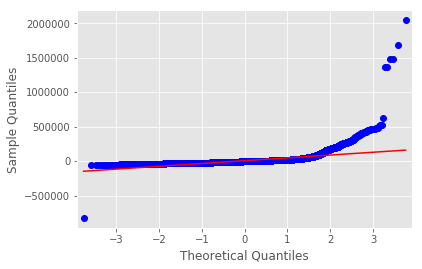

In [37]:
#Q-Q plot to check multivariate normality
plot4= model_4.resid
statmodel.qqplot(plot3,line='r')

In [38]:
#Checking multicollinearity using corelation matrix
model4.corr()

,Popularity,MSRP,citympg,highwayMPG,EngineHP
Popularity,1.000000,-0.048476,-0.003217,-0.020991,0.037315
MSRP,-0.048476,1.000000,-0.157676,-0.160043,0.661644
citympg,-0.003217,-0.157676,1.000000,0.886829,-0.346308
highwayMPG,-0.020991,-0.160043,0.886829,1.000000,-0.353343
EngineHP,0.037315,0.661644,-0.346308,-0.353343,1.000000


# Comparing AIC and BIC for all models

AIC: The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

BIC: The Bayesian information criterion (BIC)ca criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

Consusion is that both AIC and BIC values should be as low as possible. In our models, all models summary have significantlly low value of AIC and BIC.


# Fitting and prediction of Model_1

In [39]:
X1= df[['Popularity', 'citympg', 'highwayMPG']]
y1=df['MSRP']

In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [41]:
linearModel_1 = linear_model.LinearRegression()
model1 = linearModel_1.fit(X1_train,y1_train)

In [42]:
print(linearModel_1.intercept_)

70817.5848225154


In [43]:
scores1 = cross_val_score(linearModel_1, X1_train, y1_train,scoring='r2',cv=5)
scores1

array([ 0.02550835, -0.0138412 ,  0.03093152,  0.03327655,  0.02073701])

In [44]:
print('R squared: %2f' %(scores1.mean()))

R squared: 0.019322


In [45]:
predictions1 = linearModel_1.predict(X1_test)
print(predictions1)

[39597.07084982 45120.09443087 37817.28932813 ... 40416.44660156
 36103.72744862 37120.33972654]


In [46]:
valid1=r2_score(y1_test,predictions1)
valid1

0.04363257470785742

After fitting model, prediction and cross validation we are getting R square value this model is around 0.019 and after cross validation value becomes 0.0436.This is not a significant change hence  we can conclude that Linear Regression model may not be best for this data set. But we can try interaction effect on our model to check if the value of R square can improve or not. 

# Fitting and prediction of Model_2

In [47]:
X2= df[['Popularity', 'citympg', 'EngineHP']]
y2=df['MSRP']

In [48]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [49]:
linearModel_2 = linear_model.LinearRegression()
model2 = linearModel_2.fit(X2_train,y2_train)

In [50]:
scores2 = cross_val_score(linearModel_2, X2_train, y2_train,scoring='r2',cv=5)
scores2

array([0.54164934, 0.47441645, 0.427617  , 0.46852307, 0.36825016])

In [51]:
print('R squared: %2f' %(scores2.mean()))

R squared: 0.456091


In [52]:
predictions2 = linearModel_2.predict(X2_test)
print(predictions2)

[34384.39815776 26699.48543827 78069.46964421 ... 48155.3251144
 14035.81090361 40544.17269399]


In [53]:
valid2=r2_score(y2_test,predictions2)
valid2

0.5179628184633832

After fitting model, prediction and cross validation we are getting R square value in all three models around 0.45 and after cross validation value is changing to 0.51 for this set of parameters. 

# Fitting and prediction of Model_3

In [54]:
X3= df[['citympg', 'highwayMPG','EngineHP']]
y3=df['MSRP']

In [55]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [56]:
linearModel_3 = linear_model.LinearRegression()
model3 = linearModel_3.fit(X3_train,y3_train)

In [57]:
scores3 = cross_val_score(linearModel_3, X3_train, y3_train,scoring='r2',cv=5)
scores3

array([0.54181474, 0.4583459 , 0.42292155, 0.4630639 , 0.36432671])

In [58]:
print('R squared: %2f' %(scores3.mean()))

R squared: 0.450095


In [59]:
predictions3 = linearModel_3.predict(X3_test)
print(predictions3)

[46706.49125351 22801.39719504 90768.80465624 ... 42613.60234749
 12810.25883391 41043.84771048]


In [60]:
valid3=r2_score(y3_test,predictions3)
valid3

0.5129282159960651


After fitting model, prediction and cross validation we are getting R square value in all three models around 0.45 and after cross validation value is 0.51.

# Fitting and prediction of Model_4

In [61]:
X4= df[['Popularity','citympg','highwayMPG','EngineHP']]
y4=df['MSRP']

In [62]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=0)

In [63]:
linearModel_4 = linear_model.LinearRegression()
model4 = linearModel_4.fit(X4_train,y4_train)

In [64]:
scores4 = cross_val_score(linearModel_4, X4_train, y4_train,scoring='r2',cv=5)
scores4

array([0.54302164, 0.46871602, 0.42834578, 0.46910564, 0.36865947])

In [65]:
print('R squared: %2f' %(scores4.mean()))

R squared: 0.455570


In [66]:
predictions4 = linearModel_4.predict(X4_test)
print(predictions4)

[33669.55159585 27446.84492593 77880.84102801 ... 47107.1706398
 14774.20307186 41313.12601166]


In [67]:
valid4=r2_score(y4_test,predictions4)
valid4

0.5186723841413445

 After fitting model, prediction and cross validation we are getting R square value in all three models around  and after cross validation value is dropping very significantly. So we can conclude that Linear Regression model may not be best for this data set. But we can try interaction effect on our model to check if the value of R square can improve or not. 

# Interaction Effect

In [ ]:
df['highcity'] = df['citympg'] * df['highwayMPG']

In [100]:
df.describe()

,Year,EngineHP,EngineCylinders,Number of Doors,highwayMPG,citympg,Popularity,MSRP,highcity
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04,11914.000000
mean,2010.384338,249.386070,6.242621,3.559956,26.637485,19.733255,1554.911197,4.059474e+04,596.282189
std,7.579740,108.875192,12.345624,5.588163,8.863001,8.987798,1441.855347,6.010910e+04,877.887886
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03,84.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04,340.000000
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04,468.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04,672.000000
max,2017.000000,1001.000000,249.386070,249.386070,354.000000,137.000000,5657.000000,2.065902e+06,15207.000000


In [70]:
# Summary of Linear model for interaction effect
model_5 = ols("MSRP ~ Popularity+citympg+highwayMPG+EngineHP-1+highcity-1", data=df).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     3622.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:56:37   Log-Likelihood:            -1.4474e+05
No. Observations:               11914   AIC:                         2.895e+05
Df Residuals:                   11909   BIC:                         2.895e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Popularity    -4.0677      0.288    -14.141      0.000      -4.632      -3.504
citympg    -1419.7727    147.087     -9.653      0.000   -1708.087   -1131.459
highwayMPG  -524.3302     96.684     -5.423      0.000    -713.847    -334.813
EngineHP     314.2773      3.107    101.150      0.000     308.187     320.368
highcity      19.8271      0.983     20.161      0.000      17.899      21.755
==============================================================================
Omnibus:                    23457.637   Durbin-Watson:                   0.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        103516415.826
Skew:                          15.538   Prob(JB):                         0.00
Kurtosis:                     458.589   Cond. No.                         900.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After implementing interaction in the best model whose R square value was greater we came to conclusion that t-value increases significantlly and R sqaure value also increaded little bit.

In [71]:
X5= df[['Popularity','citympg','highwayMPG','EngineHP','highcity']]
y5=df['MSRP']

In [72]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=0)

In [73]:
    linearModel_5 = linear_model.LinearRegression()
    model = linearModel_5.fit(X5_train,y5_train)

In [74]:
scores5 = cross_val_score(linearModel_5, X5_train, y5_train,scoring='r2',cv=5)
scores5

array([0.54478474, 0.47703615, 0.43023803, 0.47096687, 0.37126588])

In [75]:
print('R squared: %2f' %(scores5.mean()))

R squared: 0.458858


In [76]:
predictions5 = linearModel_5.predict(X5_test)
print(predictions5)

[31379.83045361 25318.95625735 77848.40174851 ... 51786.66630169
 16256.74140154 42922.45136113]


In [77]:
valid5=r2_score(y5_test,predictions5)
valid5

0.5186487106225204

After fitting model using interaction effect, prediction and cross validation we are getting R square value around 0.45 and after cross validation value is 0.51. So we can conclude that Linear Regression model may not be best for this data set.

# Logistic Regression

#### We are going to use 'Logistic Regression model' for predicting wheather the car is popular or not. We can not use linear regression for predicting the binary data. 

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 18 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11914 non-null object
EngineHP             11914 non-null float64
EngineCylinders      11914 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11914 non-null float64
Market Category      11914 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highwayMPG           11914 non-null int64
citympg              11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
Popular              11914 non-null object
highcity             11914 non-null int64
dtypes: float64(3), int64(6), object(9)
memory usage: 1.6+ MB


In [79]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,EngineHP,EngineCylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highwayMPG,citympg,Popularity,MSRP,Popular,highcity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Popular,494
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Popular,532
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Popular,560
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Popular,504
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Popular,504


### Heatmap for cross checking the null values in the dataset

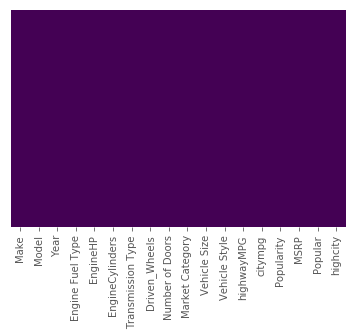

In [80]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Modification in Popular column to apply logistic regression to it and predicting wheather the car is popular or not.  

#### We are going to use get_dummies method to convert categorical variables in to dummy/indicator variables.  

In [81]:
popular1=pd.get_dummies(df['Popular'],drop_first=True)

In [82]:
popular1.head()

,Popular
0,1
1,1
2,1
3,1
4,1


## Concatenation of the new columns in the dataset 

### We are going to add this column to the final dataset by using concat method 

In [83]:
df = pd.concat([df,popular1],axis=1)

In [84]:
df.head()

,Make,Model,Year,Engine Fuel Type,EngineHP,EngineCylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highwayMPG,citympg,Popularity,MSRP,Popular,highcity,Popular
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Popular,494,1
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Popular,532,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Popular,560,1
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Popular,504,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Popular,504,1


### Dropping of unnecessory columns from the dataset. 

In [85]:
df.drop(['Driven_Wheels','Market Category','Vehicle Style','Vehicle Size','Transmission Type','Engine Fuel Type','Make','Model','Popular'],axis=1,inplace=True)

In [86]:
df.head(5)

,Year,EngineHP,EngineCylinders,Number of Doors,highwayMPG,citympg,Popularity,MSRP,highcity
0,2011,335.0,6.0,2.0,26,19,3916,46135,494
1,2011,300.0,6.0,2.0,28,19,3916,40650,532
2,2011,300.0,6.0,2.0,28,20,3916,36350,560
3,2011,230.0,6.0,2.0,28,18,3916,29450,504
4,2011,230.0,6.0,2.0,28,18,3916,34500,504


## Train-test split of the dataset to predict popularity.

In [87]:
x = df.drop('MSRP',axis=1)
y = df ['MSRP']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel= LogisticRegression()

In [92]:
logmodel.fit(X_train,y_train)

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
prediction = logmodel.predict(X_test)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        2000       0.16      0.98      0.27       285
        2008       0.00      0.00      0.00         1
        2038       0.00      0.00      0.00         1
        2044       0.00      0.00      0.00         1
        2046       0.00      0.00      0.00         1
        2047       0.00      0.00      0.00         1
        2048       0.00      0.00      0.00         1
        2060       0.00      0.00      0.00         1
        2063       0.00      0.00      0.00         1
        2073       0.00      0.00      0.00         1
        2079       0.00      0.00      0.00         2
        2080       0.00      0.00      0.00         3
        2084       0.00      0.00      0.00         2
        2087       0.00      0.00      0.00         1
        2093       0.00      0.00      0.00         1
        2098       0.00      0.00      0.00         1
        2104       0.00      0.00      0.00         1
        2107       0.00    

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Home\Anaconda3\lib\site-pac

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_test,prediction)

array([[279,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [98]:
sns.set_style('whitegrid')

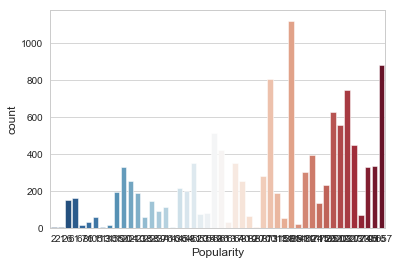

In [104]:
sns.countplot(x='Popularity' , data=df, palette='RdBu_r')

C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


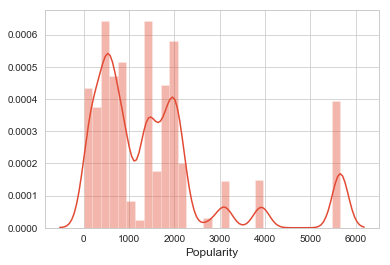

In [102]:
sns.distplot(df['Popularity'].dropna(),kde=True,bins=30)

 
Seeing these results and confusion matrix we are able to predict whether the model is popular or not. Hence Logistic regression model is better approach to  analsye, train and to represnt this data.

# Regularization

### Ridge regression with an alpha of 0.5

In [ ]:
X = df[['Popularity','MSRP','citympg','highwayMPG','EngineHP']]
y = df.MSRP
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: ")
plt.title("Ridge Regression - Prices vs Predicted prices: ")


In [ ]:
from sklearn import metrics

In [ ]:
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_ridge

In [ ]:
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_linear

In [ ]:
Ridge_predicted = pd.DataFrame([])
Ridge_predicted = Ridge_predicted.append(pd.DataFrame({'y_test':y_test, 'y_pred' :y_pred}), ignore_index=True)
Ridge_predicted.head()

In [ ]:
#Used Ridge Regression for regularization of model
print(rmse_ridge)
print(rmse_linear)

#### ** Regularization does not help as we can see that the rmse and the model scores are not that far apart ** 

•Is there any multi-colinearity in the model?
Ans: Heatmap helps us to predict that the model has multi-colinearity 

•In the multiple regression models are predictor variables independent of all the other predictor variables?
Ans:From mutiple regression model we can see that the predictor variables are not independent of other predictor variables

•Cross-validate the model. How well did it do?
Ans: Done the cross validation using K-Fold, and found that there was a slight change in the RMSE value , but no significant imporvement

•Does the model make sense? 
Ans:Yes the model makes sense in prediction.

•Are any model assumptions violated?
Ans:Below are the assumptions violated 
a)No Multi-collinearity between explanatory/predictor variables 
b)The model has been assumed based on the co-relation obtained between the independent and dependent variables. 
c)The rsme's calculated are pretty much same even when the data is split into test and train which does not show much of a difference in the R^2 value of the model which plays a crucial role in prediction. 
d)Also, since the pvalues are 0, beta1 is never zero.

•Is the relationship significant? 
Ans: Relatioship  between the predictor varibles : 'Popularity','citympg','highwayMPG','EngineHP' and target variable : 'MSRP' is significant.
•In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
Ans:The most significant predictor variable is the '' variable 

•Does regularization help with creating models that validate better on out of sample data?
Ans:Regularization does not help as we can see that the rmse and the model scores are nearly same.

 

# Contribution:

Performed various data cleaning steps. 

Used target encoding for catagorical variables. 

Performed Linear regression to check RMSE by the model. 


# Conclusion:

# Citations:

Dataset & Kernels: https://www.kaggle.com/c/restaurant-revenue-prediction/kernels

Linear Regression Modelling: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Gradient Boosting Model: https://towardsdatascience.com/boosting-algorithm-gbm-97737c63daa3


# License:

Copyright 2019 Nikhil Kashid

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
